<a href="https://colab.research.google.com/github/riyanagpal24/BreastCancer-SVM/blob/master/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv("breast-cancer.csv")

In [49]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
feature_names = ['id','radius_mean', 'perimeter_mean','area_mean', 'concavity_mean', 'concave points_mean', 'area_worst','perimeter_worst']
cancer = data[feature_names]
cancer.head()

,id,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_worst,perimeter_worst
0,842302,17.99,122.80,1001.0,0.3001,0.14710,2019.0,184.60
1,842517,20.57,132.90,1326.0,0.0869,0.07017,1956.0,158.80
2,84300903,19.69,130.00,1203.0,0.1974,0.12790,1709.0,152.50
3,84348301,11.42,77.58,386.1,0.2414,0.10520,567.7,98.87
4,84358402,20.29,135.10,1297.0,0.1980,0.10430,1575.0,152.20


---

Data pre-proceesing

In [0]:
cancer = cancer.set_index('id')

In [0]:
data.diagnosis.replace(to_replace=dict(B=0, M=1), inplace = True)

In [53]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


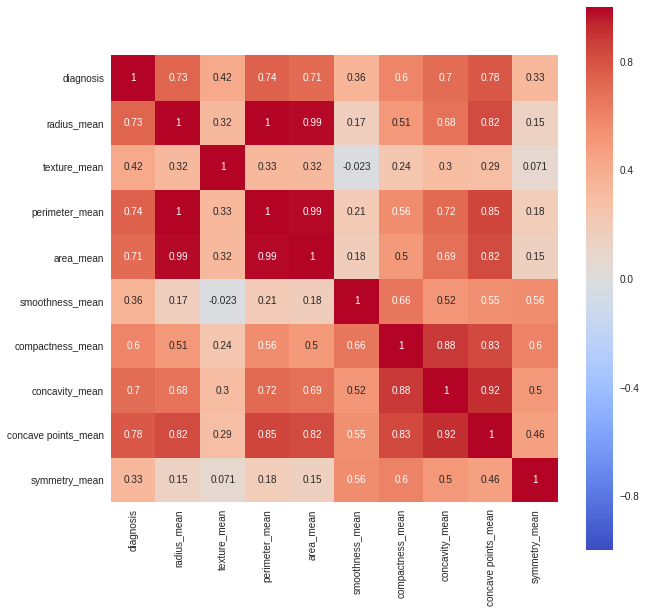

In [54]:
#Attribute corelation

# red suggests that attributes are correlated with each other. 
# yellow and green suggest some moderate correlation
# blue shows negative correlations.
from matplotlib import cm as cm

features_mean= list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


In [0]:
x_train, x_test, y_train, y_test = train_test_split(cancer, data.diagnosis, test_size = 0.20, random_state = 0) #random =0-42-21 for resuability

In [56]:
svm = SVC()
svm.fit(x_train, y_train)
print("Accuracy on the training subset {:.3f}".format(svm.score(x_train, y_train))) # 100 : signifies we are over fitting the data
print("Accuracy on the test subset {:.3f}".format(svm.score(x_test, y_test)))

Accuracy on the training subset 1.000
Accuracy on the test subset 0.588


'\nlarge diff between the max and min value of each feature. A diff in order of mangnitude.\n'

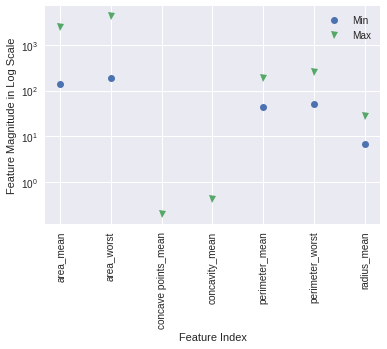

In [58]:
plt.plot(x_train.min(axis=0), 'o', label='Min')
plt.plot(x_train.max(axis=0), 'v', label='Max')
plt.xticks(rotation = 90)
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

'''
large diff between the max and min value of each feature. A diff in order of mangnitude.
'''

In [0]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

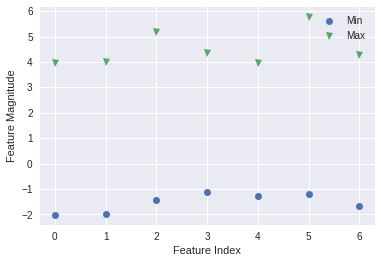

In [60]:
plt.plot(rescaledX.min(axis=0), 'o', label='Min')
plt.plot(rescaledX.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude')
plt.legend(loc='upper right')

#not much of a large difference between the min and max values

In [83]:
svm2 = SVC(C = 10)
svm2.probability = True
svm2.fit(rescaledX, y_train)
print("Accuracy on the training subset {:.3f}".format(svm2.score(rescaledX, y_train)))
print("Accuracy on the testing subset {:.3f}".format(svm2.score(X_test_scaled, y_test)))

Accuracy on the training subset 0.967
Accuracy on the testing subset 0.956


In [84]:
#calculated probability for both class[0,1]
print('Predicted probabilities for the samples (malignant and benign):\n\n{}\n\n'.format(svm2.predict_proba(X_test_scaled[:10])))

# 1 malignant 0 benign
svm2.predict(X_test_scaled)

Predicted probabilities for the samples (malignant and benign):

[[9.73890526e-07 9.99999026e-01]
 [9.91211586e-01 8.78841384e-03]
 [9.93449148e-01 6.55085245e-03]
 [9.39671510e-01 6.03284896e-02]
 [9.96865661e-01 3.13433930e-03]
 [9.87644211e-01 1.23557887e-02]
 [9.94058425e-01 5.94157508e-03]
 [9.80911013e-01 1.90889867e-02]
 [9.22324313e-01 7.76756872e-02]
 [9.87656948e-01 1.23430519e-02]]




array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# accuracy of the model
print("Accuracy score %f" % accuracy_score(y_test, svm2.predict(X_test_scaled)))


print(classification_report(y_test, svm2.predict(X_test_scaled)))

Accuracy score 0.956140
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



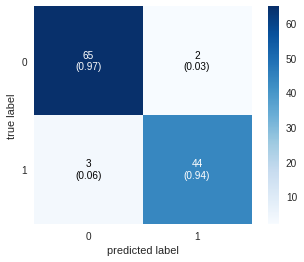

In [86]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#to check cases of miss-classification

binary = confusion_matrix(y_test, svm2.predict(X_test_scaled))

#in table format
pd.crosstab(y_test, svm2.predict(X_test_scaled), rownames=['True'], colnames=['Predicted'], margins=True)

fig , ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()